In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

In [16]:
# Load Dataset
# Assuming 'images/' contains image files and 'data.csv' has columns: ['image_name', 'caption']
df = pd.read_csv('results.csv', delimiter='|')  # For tab-delimited files

In [17]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [18]:
# Inspect the data
print("Initial Dataset:")
print(df.head())


Initial Dataset:
       image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .  


In [22]:
print(df.columns)

Index(['image_name', ' comment_number', ' comment'], dtype='object')


In [23]:
# Step 1: Check for missing values in each column
print("Checking for missing values:")
print(df.isnull().any())  # Outputs True if a column has missing values

Checking for missing values:
image_name         False
 comment_number    False
 comment            True
dtype: bool


In [26]:
# Step 2: Handle missing values in the 'comment' column
# Clean column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()
# Print the column names again to confirm
print(df.columns)

Index(['image_name', 'comment_number', 'comment'], dtype='object')


In [27]:
# Example: Assuming the correct column is 'comment' (after inspecting the column names)
df['comment'].fillna('No comment available', inplace=True)

In [28]:
print("Checking for missing values:")
print(df.isnull().any())  # Outputs True if a column has missing values

Checking for missing values:
image_name        False
comment_number    False
comment           False
dtype: bool


In [29]:
# Group comments for each image
processed_data = df.groupby('image_name')['comment'].apply(lambda x: ' '.join(x)).reset_index()
processed_data.rename(columns={'comment': 'caption'}, inplace=True)

In [30]:
# Save the cleaned dataset
processed_data.to_csv('cleaned_results.csv', index=False)
print("\nCleaned Dataset:")
print(processed_data.head())


Cleaned Dataset:
       image_name                                            caption
0  1000092795.jpg   Two young guys with shaggy hair look at their...
1    10002456.jpg   Several men in hard hats are operating a gian...
2  1000268201.jpg   A child in a pink dress is climbing up a set ...
3  1000344755.jpg   Someone in a blue shirt and hat is standing o...
4  1000366164.jpg   Two men , one in a gray shirt , one in a blac...


In [31]:
# Vectorize Captions with TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_data['caption'])

In [32]:
# Function for Text-to-Image Retrieval
def retrieve_images(query, top_k=5):
    # Vectorize the query
    query_embedding = vectorizer.transform([query]).toarray()
    # Compute cosine similarity between query and all captions
    similarities = cosine_similarity(query_embedding, tfidf_matrix).flatten()
    processed_data['similarity'] = similarities
    # Get top-k results
    top_results = processed_data.sort_values('similarity', ascending=False).head(top_k)
    return top_results

In [33]:
# User Query
query = input("Enter a text query: ")
top_results = retrieve_images(query)

Enter a text query:  Two young guys with shaggy hair look at their


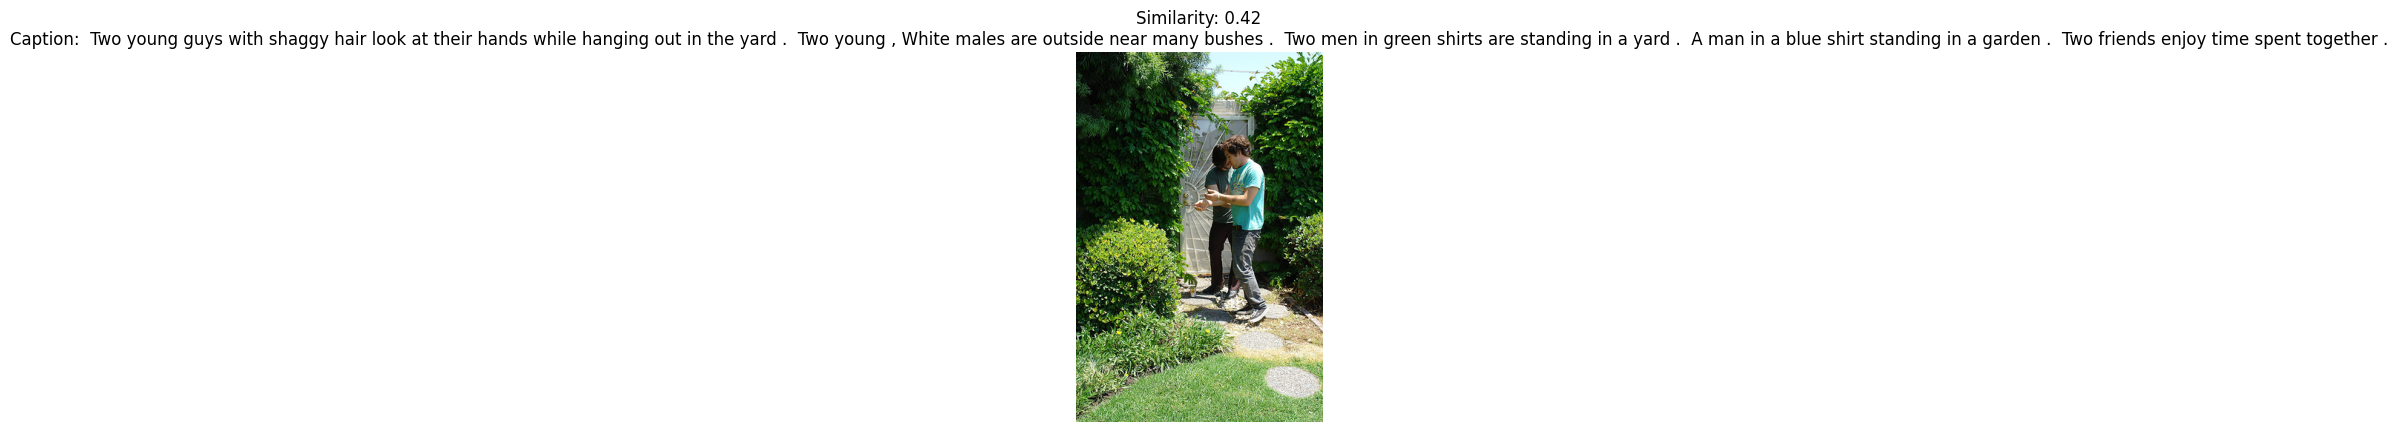

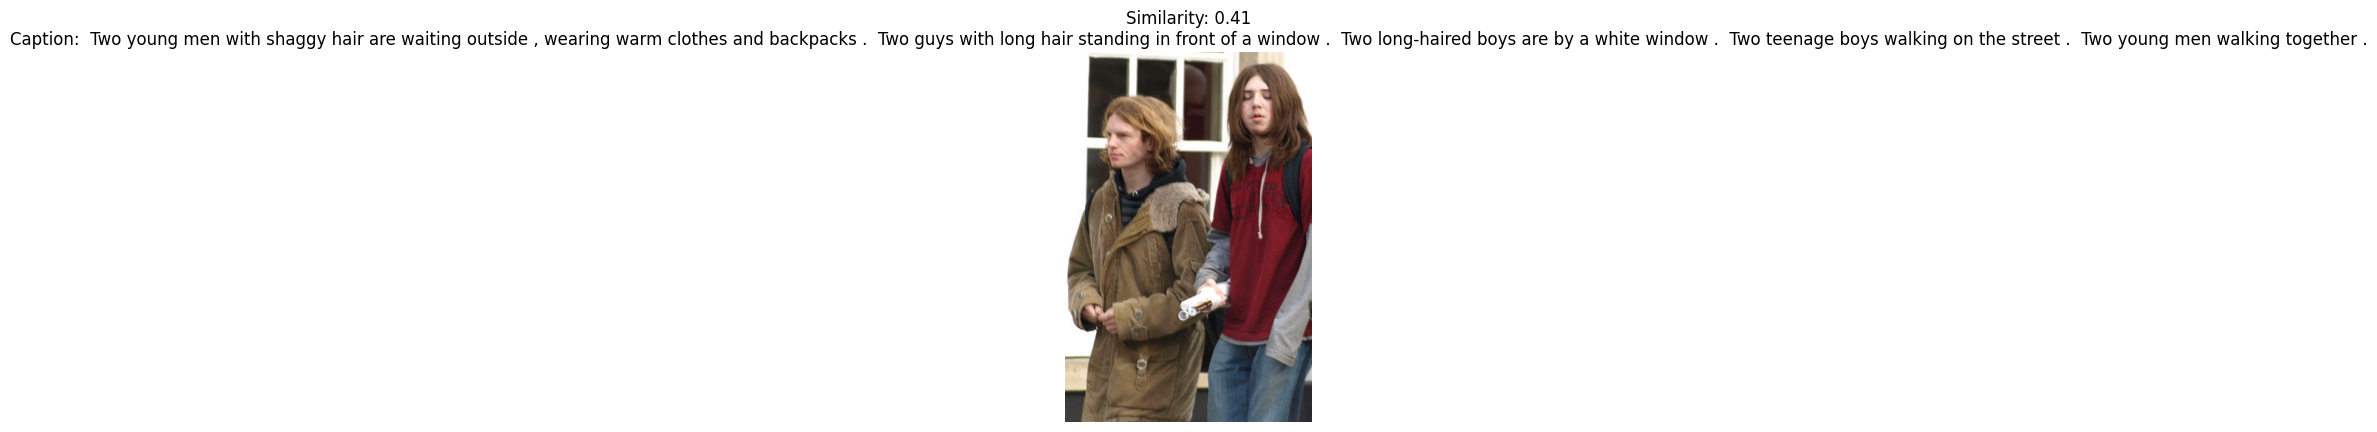

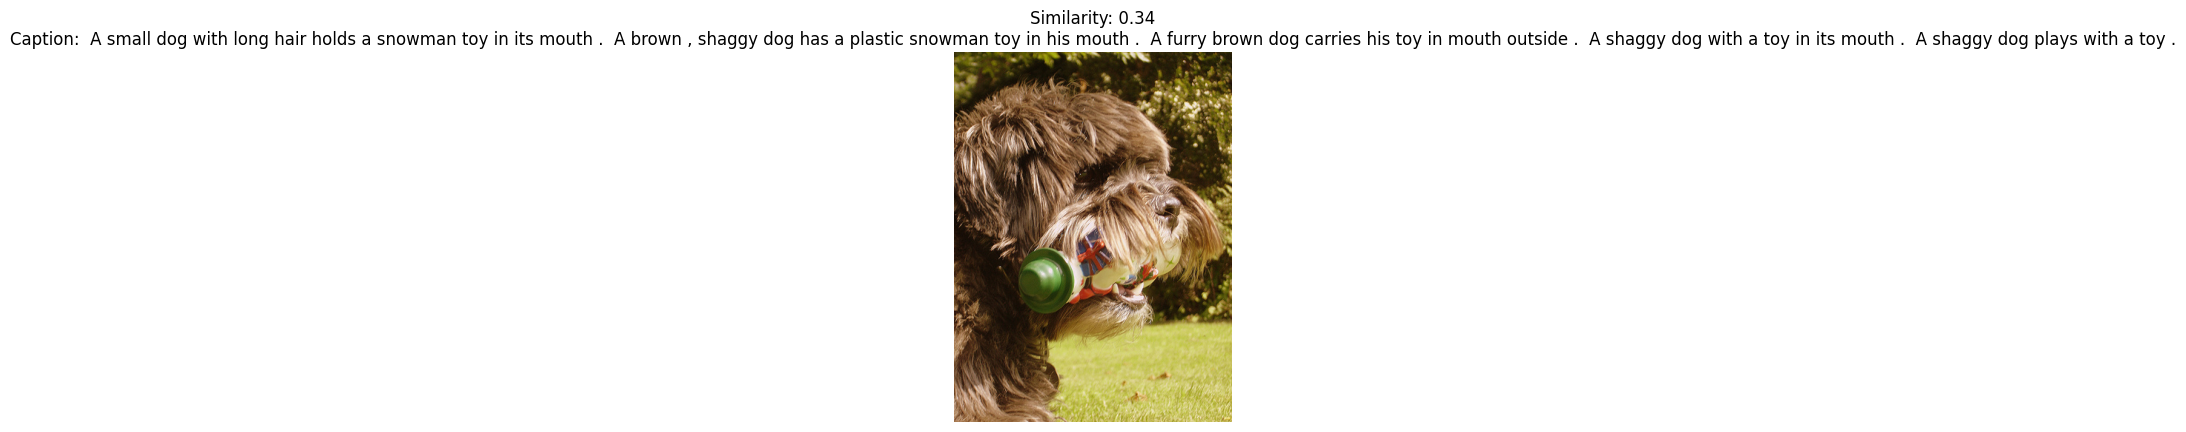

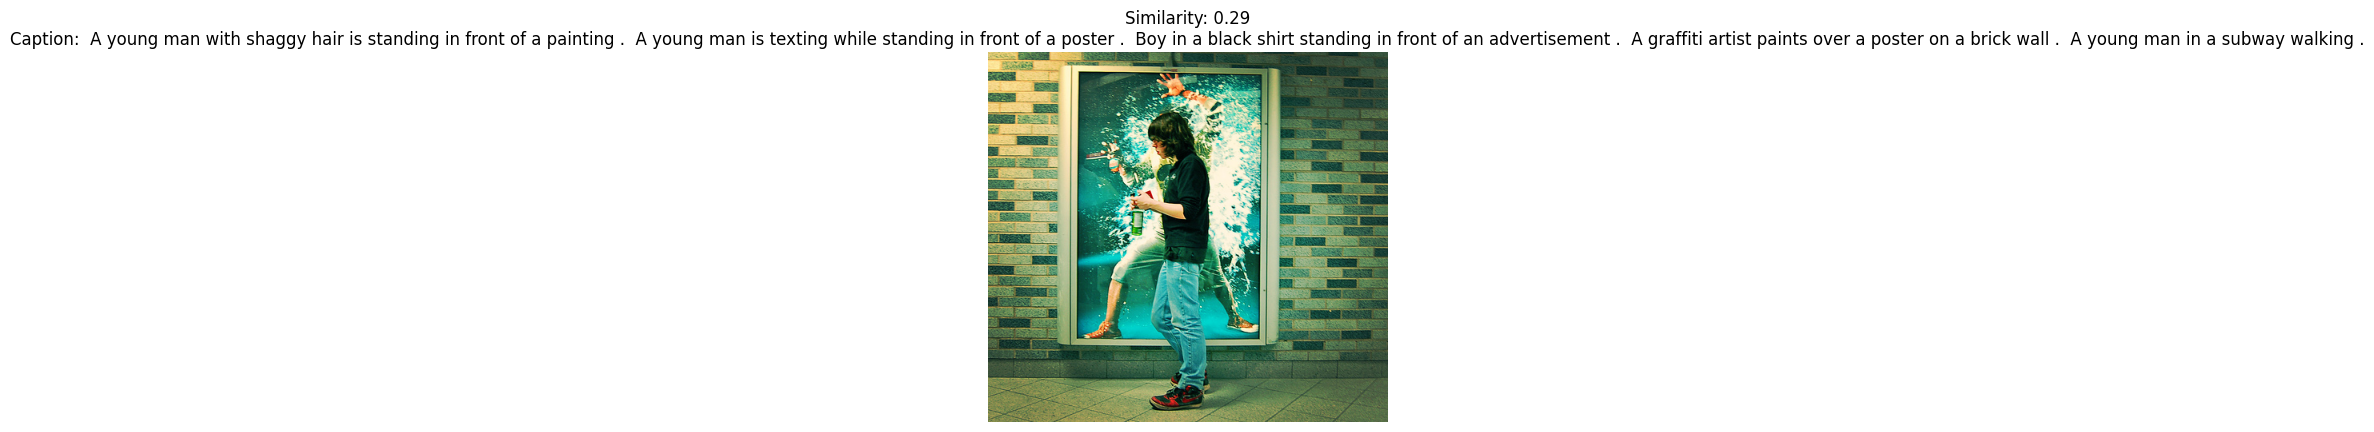

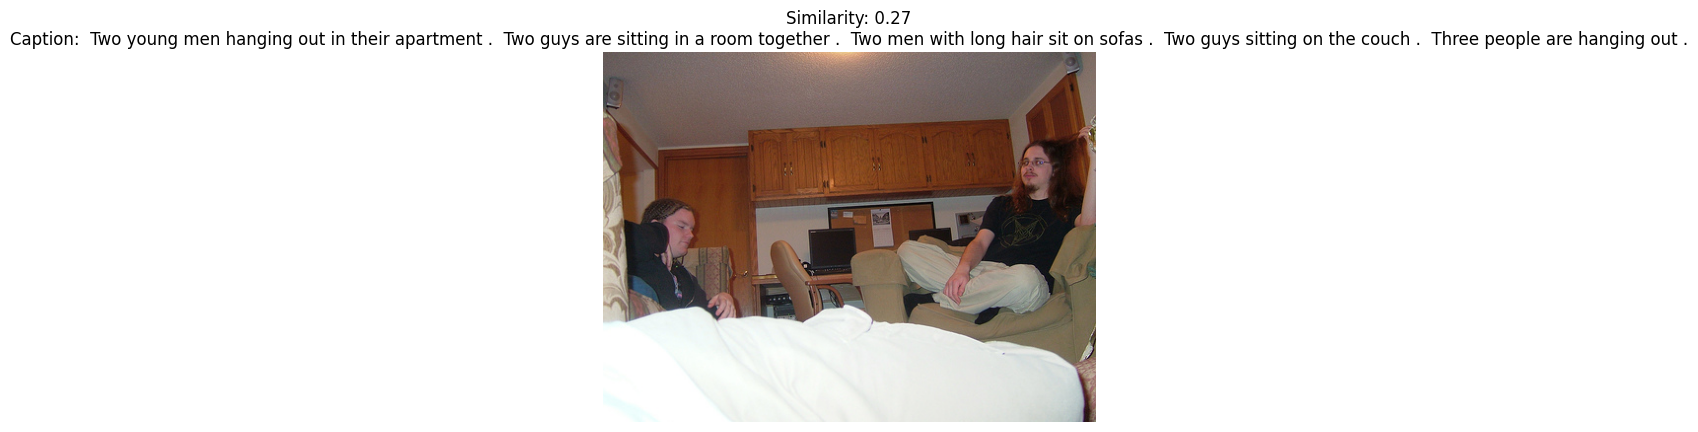

In [40]:
# Display Results
for idx, row in top_results.iterrows():
    img_path = os.path.join("images", row['image_name'])  # Assuming images are stored in 'images/' folder
    if os.path.exists(img_path):  # Check if image exists
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f"Similarity: {row['similarity']:.2f}\nCaption: {row['caption']}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image {row['image_name']} not found.")